This notebook reads through the data for all the buoys and plots the relevant figures. As done for a single buoy, we will first import some requisite modules. 

In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plots
import readsimdata
import settings
import generalfunc as gf 
import os

In [2]:
#plotting parameters.
params = { "pgf.texsystem": "pdflatex",
           "pgf.preamble": [ r"\usepackage[utf8x]{inputenc}",
                             r"\usepackage[T1]{fontenc}",
                             r"\usepackage{cmbright}"],
            'legend.fontsize': '10',
            'axes.labelsize': '11',
            'axes.titlesize':'11',
            'xtick.labelsize':'11',
            'ytick.labelsize':'11',
            "font.weight":'bold'}
plt.rcParams.update(params)

At first we try to plot all the observed buoy tracks on a single plot. For this we need to read the data from all the buoys stored in the folder named $container.$

In [3]:
importlib.reload(readsimdata)
folder='../../container/Buoy_data_excel/procesd_buoy_loc_data_Lars'
BD=readsimdata.readallbuoy(folder)

In [4]:
importlib.reload(plots)
locname='Allbuoys'
loc='../../generated_data/'+locname
gf.mkdir_p(loc)
# plots.pltallbuoytracks(loc,BD)

Allbuoys directory already exists.


Now the next plotting is about graphs for all the buoys and different forcings. Here we plot the amplitude and phase of the residual velocity vectors at the different tidal frequencies for all the buoys with different forcings.

In [5]:
def computedict(folder,barray,typ,tidindex):
    #loc means generated data folder.
    tidval={} #tid is the type of tide like M2    
    for b in barray:
        SD=readsimdata.readsimdata(b,folder)
        if typ=='buoy':
            AmvecU=SD['BAmpU'];PhvecU=SD['BPhU']
            AmvecV=SD['BAmpV'];PhvecV=SD['BPhV']
            tidvalft=np.array([AmvecU[tidindex],PhvecU[tidindex],AmvecV[tidindex],PhvecV[tidindex]])
        elif typ=='sim':
            AmvecU=SD['SAmpU'];PhvecU=SD['SPhU']
            AmvecV=SD['SAmpV'];PhvecV=SD['SPhV']
            tidvalft=np.array([AmvecU[tidindex],PhvecU[tidindex],AmvecV[tidindex],PhvecV[tidindex]])
        tidval.update({b:tidvalft})
    return(tidval)

In [6]:
def plottidal(tide,ftyp,loc,barray,btidval,stidval,ftidval):
    btidvec=np.array(list(btidval.values()))
    stidvec=np.array(list(stidval.values()))
    ftidvec=np.array(list(ftidval.values()))
    namevec=['U_Amplitude (m/s)','U_Phase (deg)','V_Amplitude (m/s)','V_Phase (deg)']
    for n in range(len(namevec)):
        name=namevec[n]
        fig=plt.figure(figsize=(12,7),frameon=True)      
        plt.plot(barray,btidvec[:,n], marker='o', linestyle='dashed',
                 linewidth=2, markersize=12,label='observed')
        plt.plot(barray,stidvec[:,n], marker='o', linestyle='dashed',
                 linewidth=2, markersize=12,label='model')
        plt.plot(barray,ftidvec[:,n], marker='o', linestyle='dashed',
                 linewidth=2, markersize=12,label=ftyp)
        plt.xlabel('Buoys',fontsize=16,fontweight='bold')
        plt.ylabel(name,fontsize=16,fontweight='bold')
        print(name)
        print(btidvec[:,n],stidvec[:,n],ftidvec[:,n])
        plt.legend(loc=1)
#         plt.title(title,fontsize=18,fontweight='bold')
        plt.savefig(loc+'/'+ftyp+'/'+ftyp+tide+name[0:4]+'.jpg',format='jpg')
        plt.close(fig)

In [39]:
basefol='h1f1A1T1O1Po1Pt1Bf0'
barray=['02','03','09','13','14','16'] 
tide='M2';tidindex=2
btidval=computedict(basefol,barray,'buoy',tidindex)
stidval=computedict(basefol,barray,'sim',tidindex)
# typ=['no_coriolis','no_wind','no_tidal','no_ocean','no_pgocean','no_pgtidal']
# typ=['cor+pgs+bf+air']
# typ=['no_air']
typ=['no_waterdrag']
on='1';off='0'
# bname='BUOY_'+b
for t in range(len(typ)):
    ofv=[on,on,on,on,on,on,on]
    if typ[t]=='cor+pgs':
        ofv[1]=ofv[2]=ofv[3]=ofv[4]=ofv[6]=off
    elif typ[t]=='cor+pgs+bf':
        ofv[1]=ofv[2]=ofv[3]=ofv[4]=off
    elif typ[t]=='cor+pgs+bf+air':
        ofv[2]=ofv[3]=ofv[4]=off
    elif typ[t]=='no_cornwind':
        ofv[0]=ofv[1]=ofv[6]=off
    elif typ[t]=='no_waterdrag':
        ofv[2]=ofv[3]=ofv[6]=off
    else:
        ofv[t]=off;ofv[6]=off
    compfol='h1'+'f'+ofv[0]+'A'+ofv[1]+'T'+ofv[2]+'O'+ofv[3]+'Po'+ofv[4]+'Pt'+ofv[5]+'Bf'+ofv[6]
    ftidval=computedict(compfol,barray,'sim',tidindex)
    ftyp=typ[t]
    gf.mkdir_p(loc+'/'+ftyp)    
    plottidal(tide,ftyp,loc,barray,btidval,stidval,ftidval)

no_waterdrag directory created
U_Amplitude (m/s)
[0.11129794 0.15245395 0.09877526 0.08262318 0.27716573 0.20448669] [0.07808554 0.13312933 0.08319742 0.06327474 0.26177156 0.16392376] [0.07090434 0.1904869  0.13111815 0.14635556 0.40960653 0.1831512 ]
U_Phase (deg)
[-141.72255485  -64.7612983  -113.03780655  -66.48364913  -26.16397569
  -68.6338441 ] [-166.05649749  -93.61819839 -142.53583515  -78.0605413   -50.26563091
  -97.1723884 ] [-139.37595899  -63.14449444  -98.22237098  -56.3555726   -32.86855658
  -68.92832479]
V_Amplitude (m/s)
[0.09542751 0.13808085 0.10526378 0.09481807 0.19137874 0.16928929] [0.06609088 0.11273061 0.08921476 0.07515547 0.18584152 0.126634  ] [0.05377101 0.15461111 0.11680628 0.106751   0.26721563 0.14727503]
V_Phase (deg)
[-57.73574638  14.69466907 -33.33549021 -10.2204829   30.34036539
  21.21509718] [-87.48301475 -17.36494194 -66.03334548 -40.34609707   2.55162386
 -11.11655799] [-60.1389966   22.47804499 -17.35483615  11.24128789  43.59778467
  24.609

The next set of codes plots the figures for all the buoys with varying thickness runs.


In [30]:
def plottidal(tide,loc,barray,btidval,allhval,typ):
    btidvec=np.array(list(btidval.values()))
    namevec=['U_Amplitude (m/s)','U_Phase (deg)','V_Amplitude (m/s)','V_Phase (deg)']
    for n in range(len(namevec)):
        name=namevec[n]
        fig=plt.figure(figsize=(12,7),frameon=True)  
        plt.plot(barray,btidvec[:,n], marker='o', linestyle='dashed',
                 linewidth=2, markersize=12,label='observed')
        for t in range(len(typ)):
            ftyp=typ[t]
            stidval=allhval[ftyp]
            stidvec=np.array(list(stidval.values()))
            plt.plot(barray,stidvec[:,n], marker='o', linestyle='dashed',
                 linewidth=2, markersize=12,label=ftyp)
        plt.xlabel('Buoys',fontsize=16,fontweight='bold')
        plt.ylabel(name,fontsize=16,fontweight='bold')
        print(name)
        print(btidvec[:,n])
        plt.legend(loc=1)
#         plt.title(title,fontsize=18,fontweight='bold')
        plt.savefig(loc+'/'+'icethick'+'/h'+tide+name[0:4]+'.jpg',format='jpg')
        plt.close(fig)

In [14]:
basefol='h1f1A1T1O1Po1Pt1Bf0'
barray=['02','03','09','13','14','16'] 
tide='M2';tidindex=2
btidval=computedict(basefol,barray,'buoy',tidindex)
# stidval=computedict(basefol,barray,'sim',tidindex)
typ=['0.5','1.0','1.5','2.0','3.0']
# typ=['cor+pgs+bf+air']
# typ=['no_air']
on='1';off='0'
# bname='BUOY_'+b
allhval={}
for t in range(len(typ)):
    ofv=[on,on,on,on,on,on,off]    
    compfol='h'+str(t) +'f'+ofv[0]+'A'+ofv[1]+'T'+ofv[2]+'O'+ofv[3]+'Po'+ofv[4]+'Pt'+ofv[5]+'Bf'+ofv[6]
    htidval=computedict(compfol,barray,'sim',tidindex)
    ftyp=typ[t]
    allhval.update({ftyp:htidval})
gf.mkdir_p(loc+'/'+'icethick')    
plottidal(tide,loc,barray,btidval,allhval,typ)

icethick directory already exists.
U_Amplitude (m/s)
[0.11129794 0.15245395 0.09877526 0.08262318 0.27716573 0.20448669]
U_Phase (deg)
[-141.72255485  -64.7612983  -113.03780655  -66.48364913  -26.16397569
  -68.6338441 ]
V_Amplitude (m/s)
[0.09542751 0.13808085 0.10526378 0.09481807 0.19137874 0.16928929]
V_Phase (deg)
[-57.73574638  14.69466907 -33.33549021 -10.2204829   30.34036539
  21.21509718]


In [7]:
# plots of energy energy
barray=['02','03','09','13','14','16'] 
fol='energy'
gf.mkdir_p(loc+'/'+fol)

energy directory already exists.


In [40]:
# reading of energy data.
basefol='h1f1A1T1O1Po1Pt1Bf0'
enerval={}
for b in barray:
    bname="BUOY_"+b
    loc='../../generated_data/'+bname+'/'+basefol+'/'
    file='enerbudget_'+bname+'.xlsx'
    df=pd.read_excel(loc+file)
    mean=np.array(df['Mean_Energy(J/m^2s)'])
    std=np.array(df['Std_Energy(J/m^2s)'])
    total=np.array(df['Total_Energy(J/m^2)'])
    totmeanstd=np.row_stack((mean,std,total))
#     print(totmeanstd)
    enerval.update({b:totmeanstd})


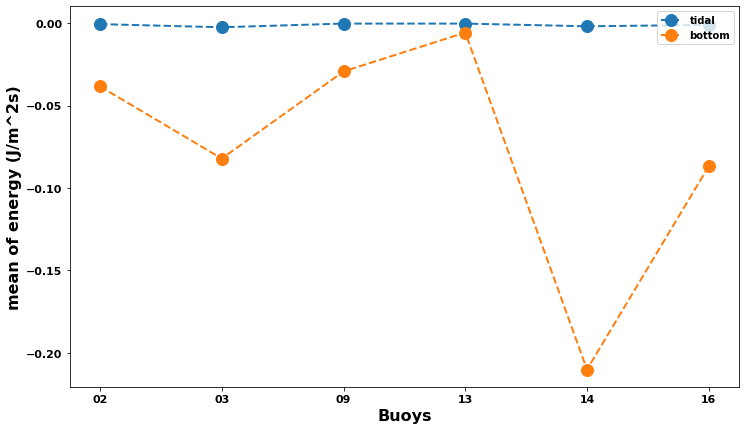

In [43]:
#plotting.
# i=4 is the total number of lines or variables to be plotted
#mean plot.
valtyp=['wind','water','tidal','bottom']
fig=plt.figure(figsize=(12,7),frameon=True)
for i in range(4):
    if i>1:
        val=[]
        for b in barray:
            meanstd=enerval[b]
            val=np.append(val,meanstd[0,i])
        plt.plot(barray,val, marker='o', linestyle='dashed',linewidth=2, markersize=12,label=valtyp[i]) 
plt.xlabel('Buoys',fontsize=16,fontweight='bold')
plt.ylabel('mean of energy (J/m^2s)',fontsize=16,fontweight='bold')
plt.legend(loc=1)       

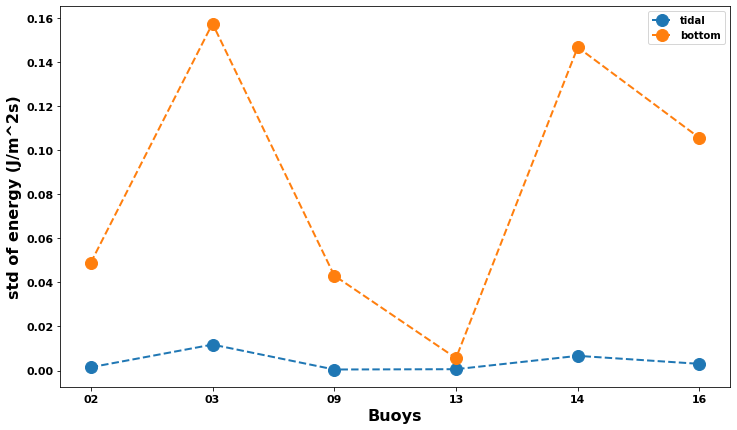

In [42]:
#plotting.
# i=4 is the total number of lines or variables to be plotted
#mean plot.
valtyp=['wind','water','tidal','bottom']
fig=plt.figure(figsize=(12,7),frameon=True)
for i in range(4):
    if i>1:
        val=[]
        for b in barray:
            meanstd=enerval[b]
            val=np.append(val,meanstd[1,i])
        plt.plot(barray,val, marker='o', linestyle='dashed',linewidth=2, markersize=12,label=valtyp[i]) 
plt.xlabel('Buoys',fontsize=16,fontweight='bold')
plt.ylabel('std of energy (J/m^2s)',fontsize=16,fontweight='bold')
plt.legend(loc=1) 

[-0.01703355 -0.21475487 -0.00694431 -0.00412851 -0.01894361 -0.09144577]
[-1.17106661 -7.14235661 -0.89873883 -0.10186652 -2.12790852 -7.55180223]


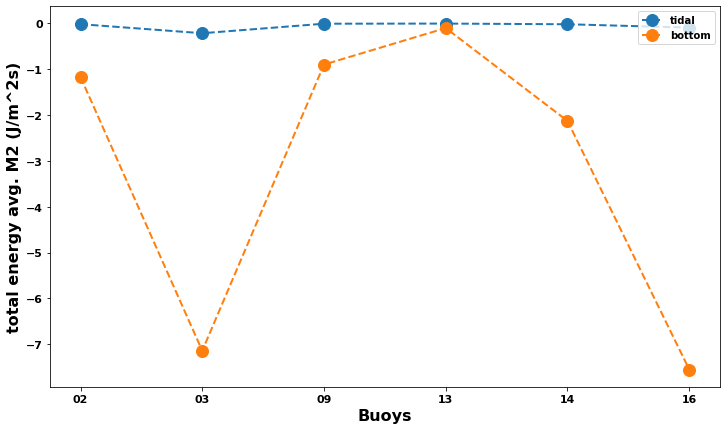

In [44]:
# i=4 is the total number of lines or variables to be plotted
# total energy per unit time
M2tim=12.42*3600
valtyp=['wind','water','tidal','bottom']
fig=plt.figure(figsize=(12,7),frameon=True)
for i in range(4):
    if i>1:
        val=[]
        for b in barray:
            meanstd=enerval[b]
            val=np.append(val,meanstd[2,i])
        plt.plot(barray,val/M2tim, marker='o', linestyle='dashed',linewidth=2, markersize=12,label=valtyp[i]) 
        print(val/M2tim)
plt.xlabel('Buoys',fontsize=16,fontweight='bold')
plt.ylabel('total energy avg. M2 (J/m^2s)',fontsize=16,fontweight='bold')
plt.legend(loc=1) 

In [ ]:
[ 0.44014807 -2.61849816 -0.03776489  0.04182074 -0.09498922  0.37601914]
[-1.17106661 -7.14235661 -0.89873883 -0.10186652 -2.12790852 -7.55180223]

# uit-ut*ut  


In [10]:
#mean plot
mb14=np.array([0.016314013,-0.108768649,-0.039895937,12.06160543])
sb14=np.array([0.030477953,0.185761821,0.066279171,7.966356184])
mb02=np.array([0.028233094,-0.290381716,-0.058750591,3.069646139])
sb02=np.array([0.039103381,0.503330787,0.11690325,3.322752497])
mb03=np.array([0.012486112,-0.10167117,-0.046372606,4.402806838])
sb03=np.array([0.030303732,0.215690605,0.140220641,6.333202746])
mb09=np.array([0.018012902,-0.068219688,-0.01432724,2.276448362])
sb09=np.array([0.029056171,0.113593573,0.022771913,2.805419903])
mb13=np.array([0.023361118,-0.082171597,-0.009793726,0.831140607])
sb13=np.array([0.035298893,0.154592736,0.013083332,0.918906703])
mb16=np.array([0.013041237,-0.168046975,-0.091288727,5.164088922])
sb16=np.array([0.033911,0.274161781,0.135788479,5.328553284])


In [15]:
i=0
windmeanarray=np.array([mb02[i],mb03[i],mb09[i],mb13[i],mb14[i],mb16[i]])
i=1
watermeanarray=np.array([mb02[i],mb03[i],mb09[i],mb13[i],mb14[i],mb16[i]])
i=2
tidemeanarray=np.array([mb02[i],mb03[i],mb09[i],mb13[i],mb14[i],mb16[i]])
i=3
bottommeanarray=np.array([mb02[i],mb03[i],mb09[i],mb13[i],mb14[i],mb16[i]])


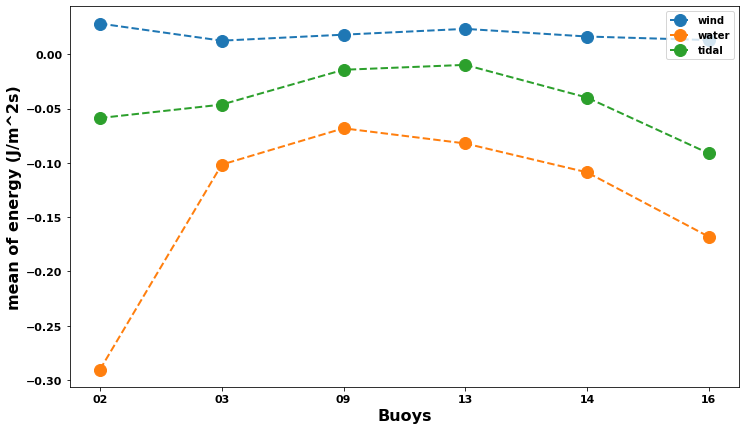

In [29]:
fig=plt.figure(figsize=(12,7),frameon=True)
plt.plot(barray,windmeanarray, marker='o', linestyle='dashed',linewidth=2, markersize=12,label='wind')
plt.plot(barray,watermeanarray, marker='o', linestyle='dashed',linewidth=2, markersize=12,label='water')
plt.plot(barray,tidemeanarray, marker='o', linestyle='dashed',linewidth=2, markersize=12,label='tidal')
# plt.plot(barray,bottommeanarray, marker='o', linestyle='dashed',linewidth=2, markersize=12,label='bottom')
plt.xlabel('Buoys',fontsize=16,fontweight='bold')
plt.ylabel('mean of energy (J/m^2s)',fontsize=16,fontweight='bold')
plt.legend(loc=1)

In [26]:
i=0
windstdarray=np.array([sb02[i],sb03[i],sb09[i],sb13[i],sb14[i],sb16[i]])
i=1
waterstdarray=np.array([sb02[i],sb03[i],sb09[i],sb13[i],sb14[i],sb16[i]])
i=2
tidestdarray=np.array([sb02[i],sb03[i],sb09[i],sb13[i],sb14[i],sb16[i]])
i=3
bottomstdarray=np.array([sb02[i],sb03[i],sb09[i],sb13[i],sb14[i],sb16[i]])


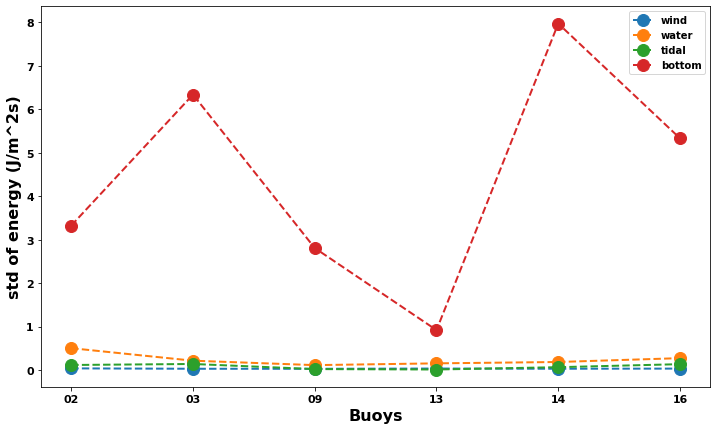

In [30]:
fig=plt.figure(figsize=(12,7),frameon=True)
plt.plot(barray,windstdarray, marker='o', linestyle='dashed',linewidth=2, markersize=12,label='wind')
plt.plot(barray,waterstdarray, marker='o', linestyle='dashed',linewidth=2, markersize=12,label='water')
plt.plot(barray,tidestdarray, marker='o', linestyle='dashed',linewidth=2, markersize=12,label='tidal')
plt.plot(barray,bottomstdarray, marker='o', linestyle='dashed',linewidth=2, markersize=12,label='bottom')
plt.xlabel('Buoys',fontsize=16,fontweight='bold')
plt.ylabel('std of energy (J/m^2s)',fontsize=16,fontweight='bold')
plt.legend(loc=1)

In [67]:
a=np.array([0,2,2,3])
sqa=np.sqrt((a)**2)
print(sqa)

[0. 2. 2. 3.]
